In [10]:
def dp_knapsack(weight, value, capacity, n_items): # credit to GeeksForGeeks
    if n_items == 0 or capacity == 0: 
        return 0
    if sol[n_items][capacity] != -1: 
        return sol[n_items][capacity] 
    if weight[n_items-1] <= capacity: 
        sol[n_items][capacity] = max( 
            value[n_items-1] + dp_knapsack( 
                weight, value, capacity - weight[n_items-1], n_items-1), 
            dp_knapsack(weight, value, capacity, n_items-1)) 
        return sol[n_items][capacity] 
    elif weight[n_items-1] > capacity: 
        sol[n_items][capacity] = dp_knapsack(weight, value, capacity, n_items-1) 
        return sol[n_items][capacity] 

values = [9,8,12,6,5,11,7,2,4,8] 
weights = [10,5,8,7,9,12,4,3,6,9] 
capacity = 40
n_items = len(values) 
sol = [[-1 for i in range(capacity + 1)] for j in range(n_items + 1)] 
print(dp_knapsack(weights, values, capacity, n_items)) 

47


Converged in 66 iterations
Approximated solution: [0.99999948 0.99999951 0.99999954 0.99999953]
Real Solution: [[1.]
 [1.]
 [1.]
 [1.]]


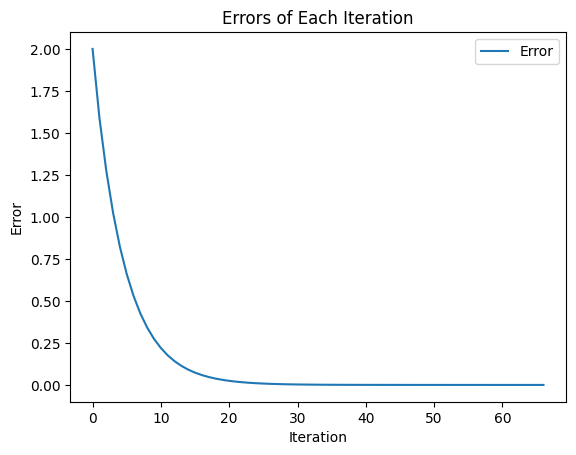

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

A = np.array([
    [8,4,1,2],
    [4,10,1,3],
    [1,1,4,1],
    [2,3,1,8]
])

b = np.array([
    [15],
    [18],
    [7],
    [14]
])

D = np.array([
    [8,0,0,0],
    [0,10,0,0],
    [0,0,4,0],
    [0,0,0,8]
])

def iter_solver(A, b, D, x0=None, tol=1e-6, max_iter=int(1e7)):
    n = len(b)
    if x0 is None:
        x_iter = np.zeros(n)   
    else:
        x_iter = x0.flatten()  
    b = b.flatten()           

    D_inv = np.linalg.inv(D)
    x_sol = np.linalg.solve(A, b)

    iterations = [0]
    errors = [np.linalg.norm(x_iter - x_sol)]

    i = 0
    while True:
        i += 1
        x_iter = scheme(D_inv, D, A, b, x_iter)
        err = np.linalg.norm(x_iter - x_sol)

        iterations.append(i)
        errors.append(err)

        if err <= tol:
            print(f"Converged in {i} iterations")
            break
        elif i >= max_iter:
            print(f"Did not converge after {i} iterations")
            break

    df = pd.DataFrame({
        "Iteration": iterations,
        "Error": errors
    })
    df.plot(x='Iteration', y='Error', kind='line', title='Errors of Each Iteration')
    plt.ylabel("Error")
    plt.xlabel("Iteration")
    return x_iter


def scheme(D_inv, D, A, b, x):
    return (D_inv @ (D - A) @ x) + D_inv @ b
    
print(f"Approximated solution: {iter_solver(A, b, D)}")
print(f"Real Solution: {np.linalg.solve(A,b)}")